# Using The ARIMA Model to Forcast the rate of Immigration into The United States through their Neighboring Borders.

The Dataset contains every information regarding Borcer Immigration into The United States from Jan1996 to Mar2019. The aim of this Project is to determine the trend of Migration and also to Forcast the Rate of Migration for Five(5) yeears to come.
The information in the Data include Port Name, State, Port Code, Border, Date, Measure(Means) of Migration, Value(Number) of Migrants and Location.

Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [6]:
df = pd.read_csv('C:/Users/OlADAYO/Documents/raw_data/Border_Crossing_Entry_Data.csv')

In [7]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [8]:
#Converting the Date Column to Date-Time and 
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#creating a new column to reprent Hour of the day
df['Month'] = df['Date'].apply(lambda time: time.month)

In [10]:
df['Year'] = df['Date'].apply(lambda time: time.year)

In [11]:
#Setting the Date Column as the Index Column
df.set_index('Date', inplace=True)

In [12]:
df.head()

,Port Name,State,Port Code,Border,Measure,Value,Location,Month,Year
Date,,,,,,,,,
2019-03-01,Calexico East,California,2507,US-Mexico Border,Trucks,34447,POINT (-115.48433000000001 32.67524),3,2019
2019-03-01,Van Buren,Maine,108,US-Canada Border,Rail Containers Full,428,POINT (-67.94271 47.16207),3,2019
2019-03-01,Otay Mesa,California,2506,US-Mexico Border,Trucks,81217,POINT (-117.05333 32.57333),3,2019
2019-03-01,Nogales,Arizona,2604,US-Mexico Border,Trains,62,POINT (-110.93361 31.340279999999996),3,2019
2019-03-01,Trout River,New York,715,US-Canada Border,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005),3,2019


# Carrying out some Exploratory Analysis

In [13]:
#Means of Transportation used by the emmigrants
df['Measure'].value_counts().to_frame()

,Measure
Personal Vehicles,30219
Personal Vehicle Passengers,30196
Trucks,29856
Truck Containers Empty,29757
Truck Containers Full,29694
Buses,28822
Bus Passengers,28820
Pedestrians,28697
Trains,27708
Rail Containers Empty,27684


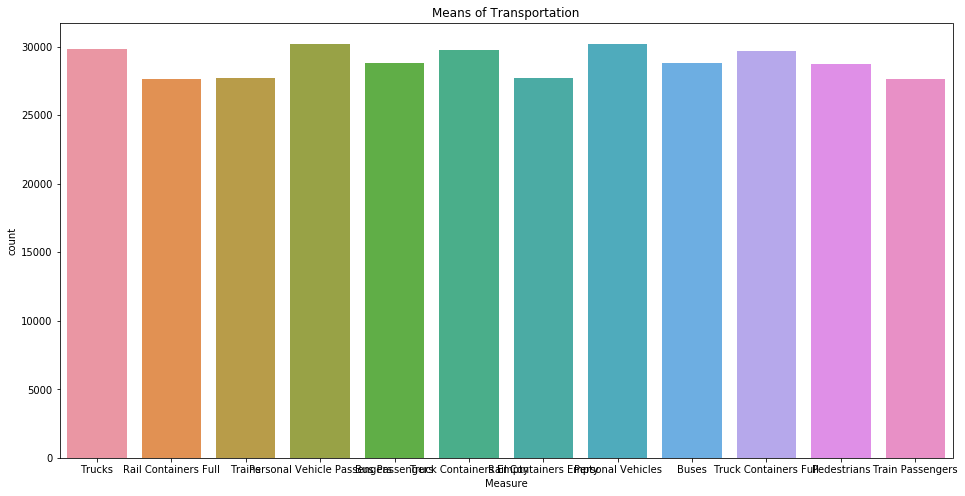

In [21]:
#Count Plot representing the means of Transportation
plt.figure(figsize=(16,8))
sns.countplot(x= 'Measure', data = df)
plt.title('Means of Transportation');

In [17]:
#Commonly used State Borders
df['State'].value_counts().to_frame()

,State
North Dakota,57071
Washington,44677
Montana,38154
Maine,38136
Texas,35754
Minnesota,23135
New York,20697
Arizona,19252
California,19102
Vermont,16247


In [18]:
#Rate of Traffic in each State Border
grp_st = (pd.DataFrame(df.groupby(['State'])['Value'].
                        sum())).sort_values(by=['Value'], ascending = False)
grp_st

,Value
State,
Texas,3633098966
California,2499521716
Arizona,888075092
New York,827170661
Michigan,753167571
Washington,501550846
Maine,231249782
Vermont,114257813
Minnesota,95764039


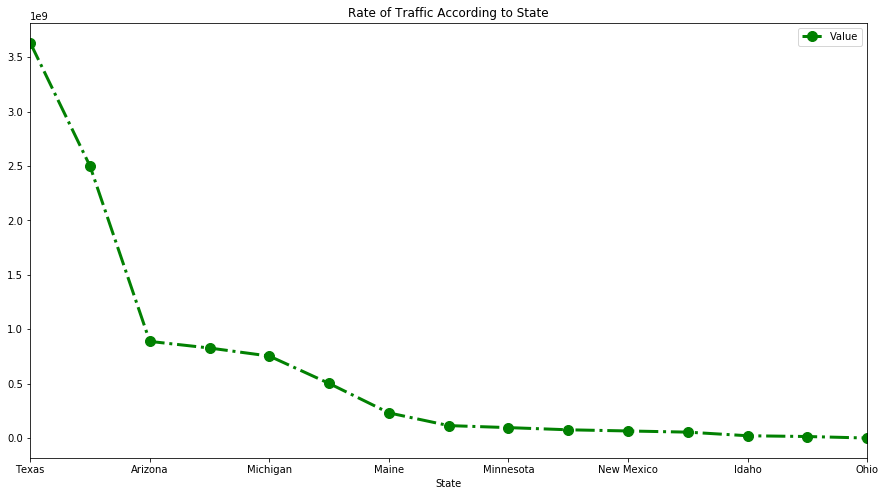

In [20]:
#Plot representing the Rate of Traffic in each State Border
grp_st.plot(figsize = (15,8), color='Green', linewidth=3, alpha =3, linestyle= '-.',
            marker= 'o', markersize= 10)
plt.title('Rate of Traffic According to State');

In [22]:
#Border traffic according to Neighboring Countries
grp_bd = (pd.DataFrame(df.groupby(['Border'])['Value'].sum())).sort_values(by=['Value'], ascending = False)
grp_bd

,Value
Border,
US-Mexico Border,7085632048
US-Canada Border,2687962794


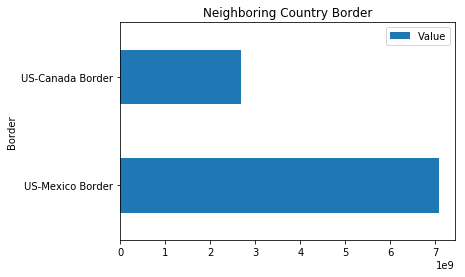

In [24]:
grp_bd.plot(kind = 'barh')
plt.title('Neighboring Country Border');

In [25]:
#Boarder traffic according to State
grp_month = (pd.DataFrame(df.groupby(['Month'])['Value'].sum())).sort_values(by=['Value'], ascending = False)
grp_month.head()

,Value
Month,
8,903140450
7,895224081
3,846878573
5,830061900
6,818955592


In [26]:
#Boarder traffic according to State
grp_yr = (pd.DataFrame(df.groupby(['Year'])['Value'].sum())).sort_values(by=['Value'], ascending = False)
grp_yr.head()

,Value
Year,
2000,540021542
1999,538456724
1998,508590704
1997,494174198
2001,493083902


In [27]:
#Pivoting the Migration according to Month and Year
df.pivot_table(index='Month', columns='Year', values= 'Value')

Year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,,,,,,,,,,,
1,26335.228155,26470.850324,32809.601942,33572.672330,33724.411003,34904.036408,29535.613269,28711.539352,26954.401652,26817.366071,...,20698.144345,19539.837121,19910.851515,20505.989394,21151.233333,21456.677177,21565.469219,35069.233577,38294.081186,37645.911311
2,26061.994337,25699.854369,30268.384304,32000.055016,32867.194984,32604.711165,28057.809061,26293.410436,26166.901652,24965.781994,...,18735.816220,17645.299242,19154.961364,19111.223485,19246.445455,19537.697447,20229.668168,31690.981774,35083.548015,33002.935443
3,28729.023463,33779.137540,34211.830097,36355.821197,36568.572816,37298.360032,32058.724919,29292.182243,28973.662162,28910.305060,...,21534.292411,20699.304545,21460.522727,22454.301515,22547.050000,22671.960961,22862.488739,37287.387606,41774.634492,38929.096734
4,28875.664239,31255.704693,34019.249191,34824.081715,36115.933657,35381.617314,30682.371359,27024.681327,28035.873874,27093.557292,...,20986.043899,20560.288636,21133.428030,21117.559848,22313.153030,22085.415916,21976.622372,38350.211443,39476.515306,NaN
5,30456.703883,34722.909385,35403.121359,38622.056634,37765.055016,34600.978964,32566.105178,30040.854167,29361.713213,28290.549851,...,21745.325959,21196.468182,21749.295455,22512.653030,23434.462879,23591.432432,23547.132883,38504.657702,40155.432964,NaN
6,30527.210356,35129.580097,34846.677994,37368.611650,36207.582524,34799.917476,32448.258091,29735.271407,28819.668168,28228.425595,...,21287.474926,21043.062121,21695.512121,22712.773485,23085.923485,23265.528529,22999.391141,38040.308068,39010.703524,NaN
7,32632.007282,37782.292880,36530.546117,39348.139159,40611.858414,38458.322006,35633.495955,30149.493884,32489.641141,31147.307292,...,23509.810472,23743.465152,24205.301515,25275.766667,25351.467424,25626.351351,25760.920420,43236.862283,43657.141968,NaN
8,32952.203883,38817.174757,37890.260518,39683.906958,40159.858414,38684.794498,36337.677184,32111.543578,31543.074324,30587.877232,...,23779.488938,23531.929545,24637.471970,26145.867424,26091.813636,25216.513514,38134.940181,42367.015990,43420.493827,NaN
9,29284.710356,34586.157767,33694.047735,36558.720874,36708.905340,27686.839806,31926.639159,28594.043578,27401.586336,26712.027530,...,20572.326696,20643.787121,21366.871970,21854.732576,22244.111364,22210.474474,34327.839729,37972.694307,38688.656716,NaN


In [28]:
#Percentage of Migration according to Month
grp_month['Perc'] = round((grp_month['Value'] / grp_month['Value'].sum()) * 100, 2)
grp_month

,Value,Perc
Month,,
8,903140450,9.24
7,895224081,9.16
3,846878573,8.66
5,830061900,8.49
6,818955592,8.38
12,811895359,8.31
10,797517443,8.16
9,788996895,8.07
1,787713198,8.06


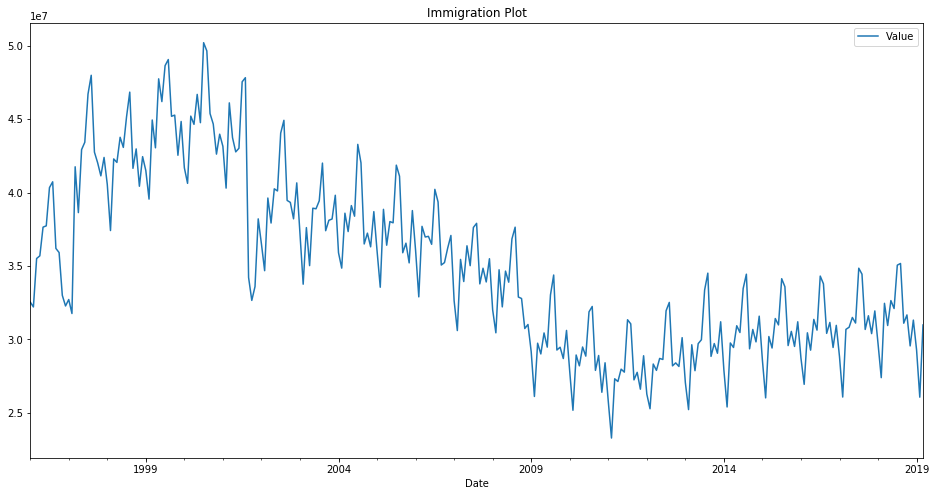

In [29]:
#Visualising the immigration based on year
year= (pd.DataFrame(df.groupby(['Date'])['Value'].sum()))
year.plot(figsize=(16,8))
plt.title('Immigration Plot');

In [30]:
#Date with the highest migration record of 501,962,57 is 2000-07-01
year['Value'].argmax()

Timestamp('2000-07-01 00:00:00')

In [31]:
#Date with the lowest migration record of 232,917,95 is 2011-02-01
year['Value'].argmin()

Timestamp('2011-02-01 00:00:00')

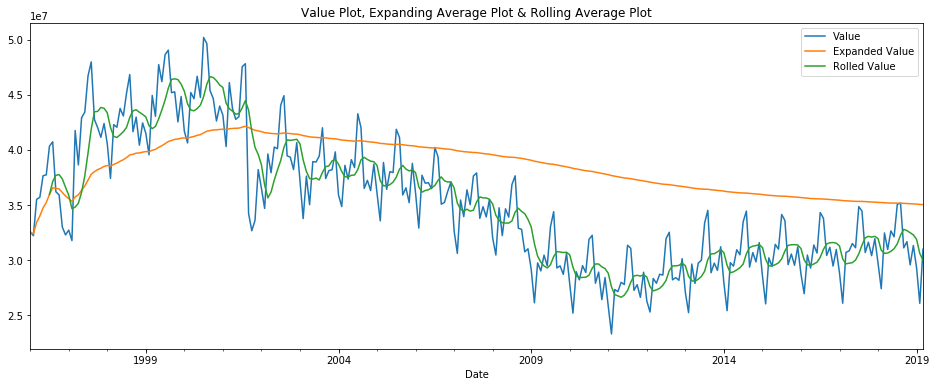

In [32]:
#in order to minimize the noise in the graph, we employ the rolling method.
#GRAPH comparing the real Value and the Expanded average Value
#GRAPH comparing the real Value and the Rolling average Value
year['Value'].plot(label = 'Value')
year['Value'].expanding().mean().plot(label = 'Expanded Value')
year.rolling(window=7).mean()['Value'].plot(label = 'Rolled Value', figsize= (16,6))
plt.title('Value Plot, Expanding Average Plot & Rolling Average Plot')
plt.legend();

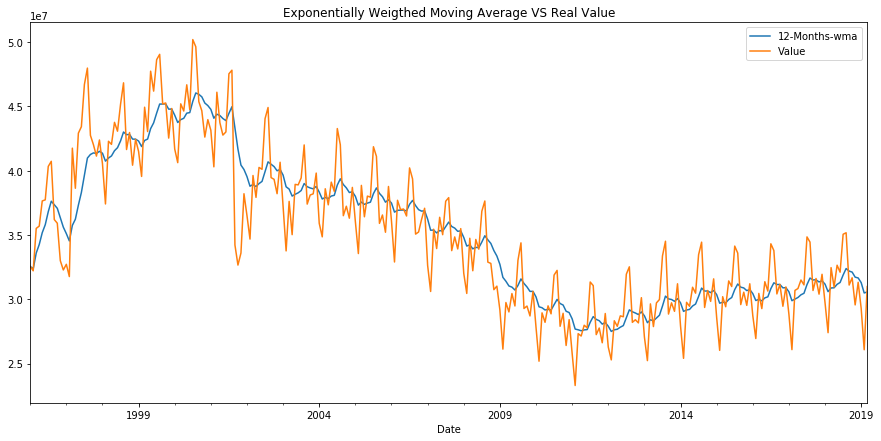

In [33]:
#Exponentially Weigthed Moving Average of one year
year['12-Months-wma'] = year['Value'].ewm(span=12).mean()
year[['12-Months-wma', 'Value']].plot(figsize = (15,7))
plt.title('Exponentially Weigthed Moving Average VS Real Value');

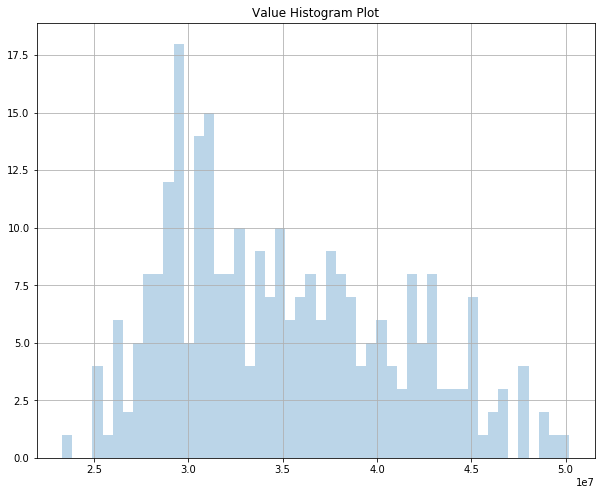

In [34]:
year['Value'].hist(bins = 50, label = 'Value', figsize=(10,8), alpha = 0.3)
plt.title('Value Histogram Plot');

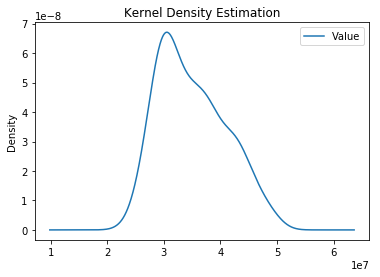

In [35]:
#Plotting the Kernel Density Estimation(kde)
year[['Value']].plot(kind= 'kde')
plt.title('Kernel Density Estimation');

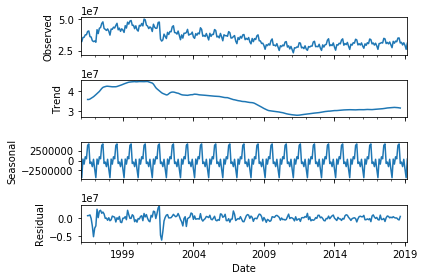

In [38]:
#Checking for the Decomposed Characteritics of the Dataset(Value)
result = seasonal_decompose(year['Value'], model = 'additive')
dec = result.plot()

As evident from the Seasonal Decomposed Chart ABOVE, the Migration Data has some level of Seasonality, 
there is a decline in migration from 2009 and 2013 probably due to the Global Economy Melt Down within that period 

# Autoregressive Integratd Moving Average(ARIMA) Model 

In [44]:
#importing the seasonal ARIMA model
model = sm.tsa.statespace.SARIMAX(year['Value'], order = (1,1,1), seasonal_order = (1,1,1,12))

In [45]:
results = model.fit()

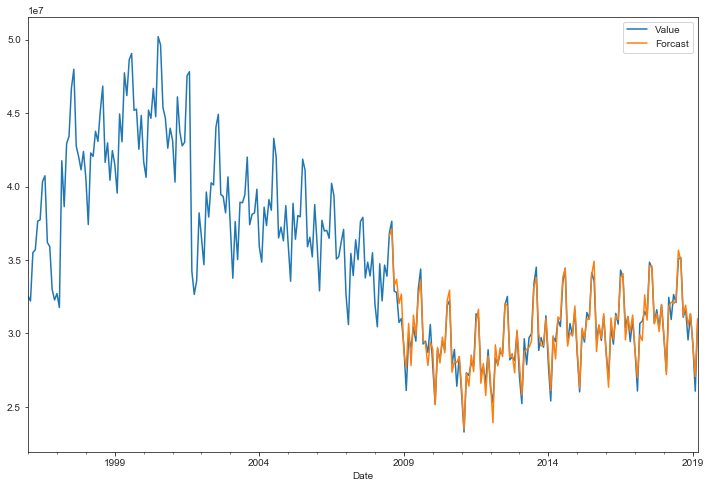

In [102]:
#making a forcaast with the model
year['Forcast'] = results.predict(start=150, end = 279)
year[['Value', 'Forcast']].plot(figsize=(12,8));

Making Futuristic(Five Years) Migration Forcast using the ARIMA Model

In [103]:
#we start by adding more dates to the existing one at the tail
from pandas.tseries.offsets import DateOffset

In [104]:
#Creating additional 60points to the Rows starting from the last one
future_dates = [year.index[-1] + DateOffset(months = x) for x in range(1,60)]

In [106]:
#Creating the newly created Data into Dataframe
future_df = pd.DataFrame(index = future_dates, columns = year.columns)

In [107]:
#Marging the newly created Dataset to the existing one
final_df = pd.concat([year, future_df])

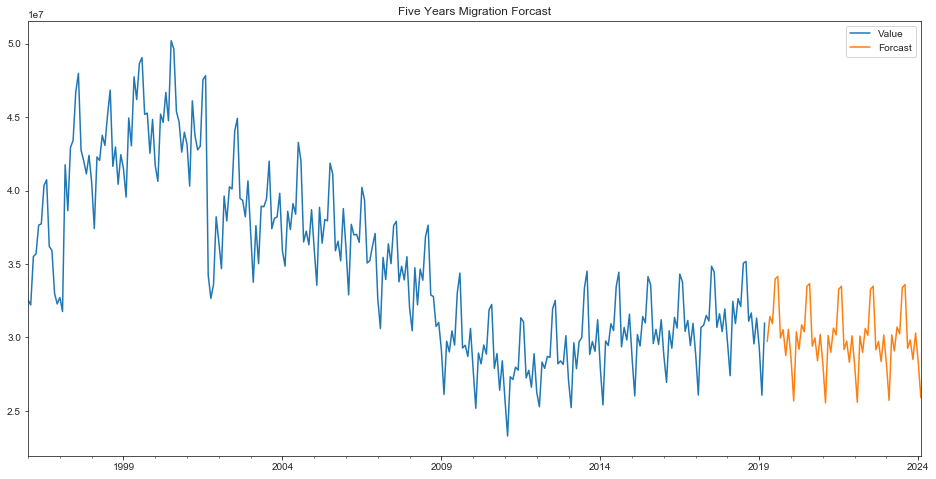

In [112]:
#now we forcast the value for newly added dates
#making a forcaast with the model
final_df['Forcast'] = results.predict(start=279, end = 339)
final_df[[ 'Value', 'Forcast' ]].plot(figsize=(16,8))
plt.title('Five Years Migration Forcast');

I was able to make the forcast for the next Five years and the result looks pretty good and steady without apparent seasonality 